## **Exploratory Data Analysis On AirBnB**

**Objective** To Uncover patterns, anomalies and key insights

**Questions/Objectives:**
1. What is the total number of listing?
2. Who is the host with the most listing?
3. What is the booking rate?
4. What is the most listed property type?

Importing Libs

In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

Loading Data into frame

In [424]:
airBnb = pd.read_csv('data\Airbnb_Open_Data.csv')
airBnb.head()

C:\Users\Great Speed\AppData\Local\Temp\ipykernel_9204\2448193993.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airBnb = pd.read_csv('data\Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Data Cleaning and preparation

In [425]:
airBnb.shape

(102599, 26)

In [426]:
print(airBnb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Wrong Data Format:
* Service fee object -> float
* Last review object -> date
* price object -> float

Checking for the missing data, and finding what percentage of the data is missing

In [427]:
percentage_missing = airBnb.isnull().sum()/len(airBnb) * 100
percentage_missing

id                                 0.000000
NAME                               0.243667
host id                            0.000000
host_identity_verified             0.281679
host name                          0.395715
neighbourhood group                0.028265
neighbourhood                      0.015595
lat                                0.007797
long                               0.007797
country                            0.518524
country code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
room type                          0.000000
Construction year                  0.208579
price                              0.240743
service fee                        0.266084
minimum nights                     0.398639
number of reviews                  0.178364
last review                       15.490404
reviews per month                 15.476759
review rate number                 0.317742
calculated host listings count  

Correcting the wrong format

In [428]:
# Removing whitespaces at the end and start, symbols using regex 
airBnb['service fee'] = airBnb['service fee'].str.replace(r'[^\d\-.]', '', regex=True)
airBnb['service fee'] = airBnb['service fee'].astype(float)

In [429]:
airBnb['price'] = airBnb['price'].str.replace(r'[^\d\-.]', '', regex=True)
airBnb['price']  = airBnb['price'].astype(float)

In [430]:
# changing the last review to datetime
airBnb['last review'] = pd.to_datetime(airBnb['last review'])

In [431]:
# Removing null values from columns less than 1%
columns_to_drop_from = percentage_missing[percentage_missing <= 1].index
AirBnb = airBnb.dropna(subset=columns_to_drop_from)

dropping unwanted column

In [432]:
AirBnb = AirBnb.drop(columns=['id', 'host id', 'license', 'house_rules'])

In [433]:
AirBnb.isna().sum()/len(AirBnb) * 100

NAME                               0.000000
host_identity_verified             0.000000
host name                          0.000000
neighbourhood group                0.000000
neighbourhood                      0.000000
lat                                0.000000
long                               0.000000
country                            0.000000
country code                       0.000000
instant_bookable                   0.000000
cancellation_policy                0.000000
room type                          0.000000
Construction year                  0.000000
price                              0.000000
service fee                        0.000000
minimum nights                     0.000000
number of reviews                  0.000000
last review                       15.296066
reviews per month                 15.296066
review rate number                 0.000000
calculated host listings count     0.000000
availability 365                   0.000000
dtype: float64

In [434]:
AirBnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99032 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NAME                            99032 non-null  object        
 1   host_identity_verified          99032 non-null  object        
 2   host name                       99032 non-null  object        
 3   neighbourhood group             99032 non-null  object        
 4   neighbourhood                   99032 non-null  object        
 5   lat                             99032 non-null  float64       
 6   long                            99032 non-null  float64       
 7   country                         99032 non-null  object        
 8   country code                    99032 non-null  object        
 9   instant_bookable                99032 non-null  object        
 10  cancellation_policy             99032 non-null  object        
 11  room t

In [435]:
percentage_of_data_loss =  100 - (len(AirBnb)/len(airBnb) * 100)
percentage_of_data_loss

3.4766420725348155

After drop null value rows less than 1% of the population, 3.5% records of the population was lost 

In [436]:
AirBnb['reviews per month'] = AirBnb['reviews per month'].fillna(int(AirBnb['reviews per month'].mean()))

In [437]:
# Filling the null value in the date field with the previous date
AirBnb['last review'] = AirBnb['last review'].fillna(method='ffill')

C:\Users\Great Speed\AppData\Local\Temp\ipykernel_9204\2445561703.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  AirBnb['last review'] = AirBnb['last review'].fillna(method='ffill')


Checking for Duplicate values and dropping them if any

In [438]:
AirBnb.duplicated().sum()

3531

In [439]:
cleanedAirBnb = AirBnb.drop_duplicates()

Perform exploratory data analysis (EDA)

In [440]:
# Descriptive statistics
cleanedAirBnb.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,95501.000000,95501.000000,95501.000000,95501.000000,95501.000000,95501.000000,95501.000000,95501,95501.000000,95501.000000,95501.000000,95501.000000
mean,40.728053,-73.949607,2012.489115,625.406310,125.082083,8.086125,27.407723,2019-05-14 00:30:49.212049920,1.320026,3.282133,8.027612,141.862912
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688700,-73.982590,2008.000000,339.000000,68.000000,2.000000,1.000000,2018-10-22 00:00:00,0.280000,2.000000,1.000000,4.000000
50%,40.722300,-73.954470,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-06-12 00:00:00,1.000000,3.000000,1.000000,98.000000
75%,40.762730,-73.932270,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-03 00:00:00,1.720000,4.000000,2.000000,269.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.055820,0.049568,5.762231,331.806693,66.364698,28.735194,49.493100,NaN,1.620913,1.283656,32.540160,135.440519


In [441]:
cleanedAirBnb.dtypes

NAME                                      object
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                    float64
service fee                              float64
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month                        float64
review rate number                       float64
calculated host list

Perform Univariate EDA

In [442]:
cleanedAirBnb['NAME'].nunique()

59611

In [443]:
# sns.displot(cleanedAirBnb["NAME"])
# plt.show()

In [444]:
cleanedAirBnb['neighbourhood group'].nunique()

6

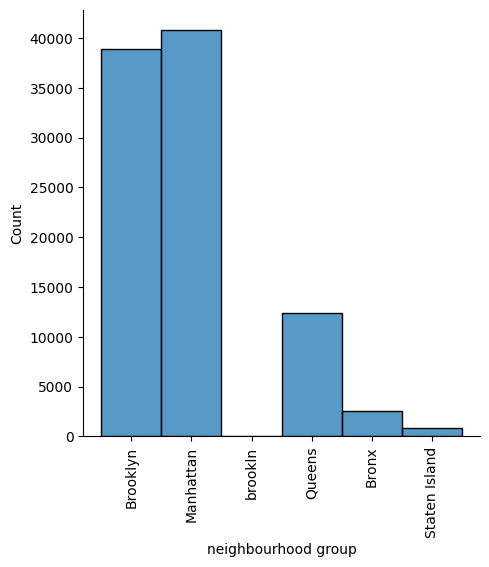

In [445]:
sns.displot(cleanedAirBnb["neighbourhood group"])
plt.xticks(rotation=90)
plt.show()

**Insight** The Manhattan and Brooklyn are the neighborhood with the highest listings

In [446]:
cleanedAirBnb['calculated host listings count'].unique()

array([  6.,   2.,   1.,   4.,   3.,   5.,  28.,  11.,   8.,   9.,   7.,
        52.,  18.,  15.,  19.,  10.,  39.,  13.,  26.,  29.,  12.,  21.,
        96.,  14.,  34.,  43., 121.,  37.,  49.,  31.,  91.,  16.,  87.,
        33.,  23.,  50.,  20.,  25., 232.,  17.,  47., 103.,  65.,  30.,
        27., 327.,  32.,  53., 208., 171.,  44.,  48., 108.,  51., 161.,
       152.,  83.,  24.,  22., 126.,  54.,  66.,  59.,  62., 102., 186.,
       125.,  55.,  63.,  67.,  58.,  56.,  80.,  46., 218.,  86., 332.])

In [447]:
cleanedAirBnb = cleanedAirBnb.rename(columns={'calculated host listings count':"total host listing",})
cleanedAirBnb

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,total host listing,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,BlissArtsSpace!,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,Cozy room in a 2B with backyard access,unconfirmed,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,False,flexible,Private room,2018.0,822.0,164.0,1.0,9.0,2019-04-25,0.91,3.0,1.0,0.0
102030,An East Williamsburg Delight,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,True,moderate,Private room,2015.0,455.0,91.0,4.0,36.0,2018-06-27,1.28,1.0,1.0,0.0
102031,Cozy bedroom in williamsburg,verified,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,True,flexible,Private room,2020.0,1078.0,216.0,1.0,58.0,2019-06-10,2.08,5.0,2.0,120.0
102032,Spacious Room w/ 2 Bed,unconfirmed,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,False,moderate,Private room,2007.0,103.0,21.0,7.0,40.0,2019-06-23,1.51,1.0,5.0,148.0


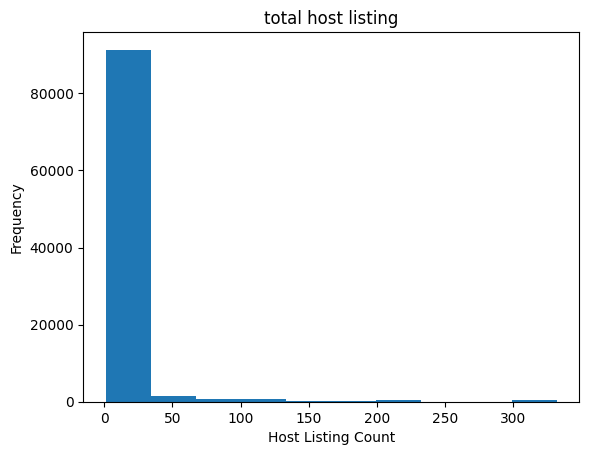

In [448]:
# Histogram for single numerical variable(column)
plt.hist(cleanedAirBnb['total host listing'])
plt.title('total host listing')
plt.xlabel('Host Listing Count')
plt.ylabel('Frequency')
plt.show()


From the graph we have an unbalanced distribution of Host listing. Meaning that most host list properties between 0 to 30 or 35.

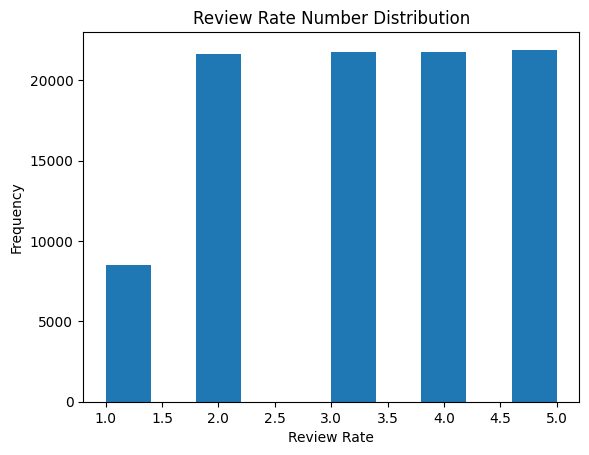

In [449]:
# Histogram for single numerical variable(column)
plt.hist(cleanedAirBnb['review rate number'])
plt.title('Review Rate Number Distribution')
plt.xlabel('Review Rate')
plt.ylabel('Frequency')
plt.show()


In [450]:
cleanedAirBnb['country'].unique()

array(['United States'], dtype=object)

**Insight** United States is the only unique value in country and country code. 

In [451]:
cleanedAirBnb['minimum nights'].unique()

array([ 1.000e+01,  3.000e+01,  3.000e+00,  4.500e+01,  2.000e+00,
        1.000e+00,  5.000e+00,  4.000e+00,  7.000e+00,  8.000e+00,
        1.500e+01,  4.700e+01,  8.100e+01,  1.440e+02,  3.710e+02,
        2.680e+02, -1.000e+01,  1.890e+02,  3.400e+02,  1.280e+02,
        3.500e+02,  1.660e+02,  1.100e+02,  1.420e+02,  1.400e+01,
        2.000e+02,  1.100e+01,  4.520e+02,  1.300e+01,  6.000e+00,
        2.100e+01,  2.700e+01,  1.800e+01, -1.000e+00, -1.200e+01,
        4.000e+01,  3.100e+01,  3.980e+02, -2.000e+00,  2.800e+01,
        6.500e+01, -3.000e+00,  9.000e+01,  1.200e+02,  3.650e+02,
        1.800e+02,  1.220e+02,  1.900e+01,  2.400e+02,  2.900e+01,
        2.000e+01,  8.800e+01,  1.150e+02,  1.500e+02,  9.000e+00,
        3.700e+02,  6.000e+01,  1.600e+01,  1.810e+02,  2.600e+01,
        8.000e+01,  2.500e+01,  2.650e+02,  3.000e+02,  1.700e+01,
        5.900e+01,  1.850e+02,  3.600e+02,  5.600e+01,  5.000e+01,
        1.200e+01,  7.000e+01,  3.900e+01,  2.400e+01,  3.200e

*Insight* Number of minimum nights cannot be negative.

In [452]:
cleanedAirBnb['minimum nights'] = abs(cleanedAirBnb['minimum nights']) # converting them to positive

In [453]:
cleanedAirBnb['availability 365'].unique()

array([ 2.860e+02,  2.280e+02,  2.890e+02,  3.740e+02,  2.190e+02,
        1.800e+02,  3.750e+02,  1.000e+00,  1.630e+02,  4.700e+01,
        6.800e+01,  2.140e+02,  3.560e+02,  3.540e+02,  3.300e+01,
        8.600e+01,  8.300e+01,  2.580e+02,  4.000e+02,  3.400e+01,
        2.030e+02,  3.500e+01,  4.100e+02,  3.880e+02,  1.300e+01,
        6.200e+01,  3.340e+02,  1.660e+02,  1.800e+01,  1.300e+02,
        4.300e+01,  3.730e+02,  1.900e+02,  3.350e+02,  5.200e+01,
        7.000e+01,  3.200e+02,  1.900e+01,  2.930e+02,  5.800e+01,
        2.400e+02,  9.600e+01,  3.000e+02,  4.250e+02,  3.610e+02,
        3.410e+02,  3.530e+02,  2.130e+02,  1.370e+02,  3.360e+02,
        2.300e+01,  3.950e+02,  7.800e+01,  1.880e+02,  3.380e+02,
        6.600e+01,  3.220e+02,  8.000e+01,  1.460e+02,  3.820e+02,
        0.000e+00,  3.190e+02,  5.000e+01,  1.180e+02,  1.450e+02,
        2.670e+02,  3.500e+02,  4.070e+02,  7.600e+01,  1.600e+01,
        3.510e+02,  3.970e+02,  2.760e+02,  3.980e+02,  1.350e

In [454]:
cleanedAirBnb['availability 365'] = abs(cleanedAirBnb['availability 365'])

**Insight** Availability 365 is now cleaned having removed the negative values

In [455]:
cleanedAirBnb.rename(columns={'review rate number':'rating'},inplace=True)

In [456]:
cleanedAirBnb['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'Queens', 'Bronx',
       'Staten Island'], dtype=object)

In [457]:
cleanedAirBnb['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'East Harlem', 'Murray Hill',
       'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side',
       'Chinatown', 'South Slope', 'Bushwick', 'Flatbush', 'East Village',
       'Williamsburg', 'Harlem', 'Gowanus', 'Clinton Hill', 'Greenpoint',
       'Flatlands', 'Fort Greene', 'West Village', 'Prospect Heights',
       'DUMBO', 'Upper East Side', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Park Slope', 'Ditmars Steinway',
       'Cobble Hill', 'Flatiron District', 'Windsor Terrace',
       'Roosevelt Island', 'Lower East Side', 'Chelsea',
       'Carroll Gardens', 'Little Italy', 'Inwood', 'Kingsbridge',
       'Astoria', 'Boerum Hill', 'Washington Heights', 'Rockaway Beach',
       'Crown Heights', 'Nolita', 'Woodlawn', 'Sunnyside', 'Gramercy',
       'East New York', 'Prospect-Lefferts Gardens', 'Concourse Village',
       'Sheepshead Bay', 'Theater District', 'Emerson Hill',
       'Long Island City', 'Fort Hamilton', 'Bensonhu

*Insight* We will be dropping one of the neighborhood columns, since both are telling us about the location of the listing

In [458]:
# renaming the neighbourhood group
cleanedAirBnb.rename(columns={'neighbourhood group':'neighborhood_group', 'neighbourhood':'neighborhood'}, inplace=True)

In [459]:
cleanedAirBnb.drop(columns=['neighborhood'], inplace=True)

In [460]:
cleanedAirBnb['host_identity_verified'].unique()

array(['unconfirmed', 'verified'], dtype=object)

**Insight** The host identity verified is clean

In [461]:
cleanedAirBnb['room type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

Perform Bivariate EDA

In [462]:
# checking for correlation
corr_matrix = cleanedAirBnb[['price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'rating', 'total host listing', 'availability 365']].corr()
corr_matrix

,price,service fee,minimum nights,number of reviews,reviews per month,rating,total host listing,availability 365
price,1.000000,0.999991,-0.003227,0.004789,0.004392,-0.005112,-0.000648,-0.003203
service fee,0.999991,1.000000,-0.003205,0.004768,0.004370,-0.005117,-0.000640,-0.003192
minimum nights,-0.003227,-0.003205,1.000000,-0.053998,-0.089126,-0.001275,0.091020,0.062392
number of reviews,0.004789,0.004768,-0.053998,1.000000,0.590660,-0.016995,-0.081077,0.098134
reviews per month,0.004392,0.004370,-0.089126,0.590660,1.000000,0.035576,-0.027252,0.070805
rating,-0.005112,-0.005117,-0.001275,-0.016995,0.035576,1.000000,0.024201,-0.007473
total host listing,-0.000648,-0.000640,0.091020,-0.081077,-0.027252,0.024201,1.000000,0.158406
availability 365,-0.003203,-0.003192,0.062392,0.098134,0.070805,-0.007473,0.158406,1.000000


Data visualization

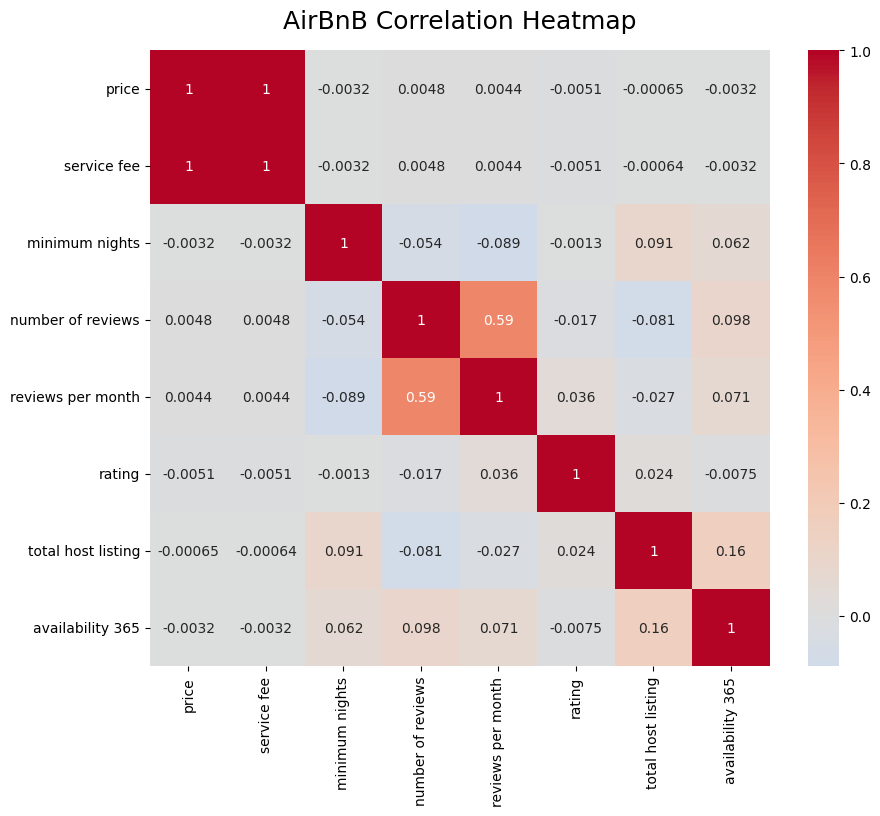

In [463]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
heatmap.set_title('AirBnB Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

**Insight** From the heatmap we can see that there is a strong correlation between price and service fee, and a weak correlation  number of reviews and review per month. showing an increase in one will lead to an increase in the other.

To that we will be dropping the correlated columns *service fee and reviews per month*

In [464]:
cleanedAirBnb.drop(columns=['service fee', 'reviews per month'], inplace=True)

In [465]:
cleanedAirBnb.head()

,NAME,host_identity_verified,host name,neighborhood_group,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,minimum nights,number of reviews,last review,rating,total host listing,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,10.0,9.0,2021-10-19,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,30.0,45.0,2022-05-21,4.0,2.0,228.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,10.0,9.0,2018-11-19,3.0,1.0,289.0
5,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,577.0,3.0,74.0,2019-06-22,3.0,1.0,374.0
7,BlissArtsSpace!,unconfirmed,Emma,Brooklyn,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,1060.0,45.0,49.0,2017-10-05,5.0,1.0,219.0


## **To Answer the questions/objectives**

1. What is the total number of listing?
2. Who is the host with the most listing?
3. What is the booking rate?
4. What is the most listed property type?

**Q1. What is the total number of listing?**

In [466]:
total_listing = cleanedAirBnb['total host listing'].sum()
print(f"The total number of listing the state is {total_listing}.")

The total number of listing the state is 766645.0.


**Q2. Who is the host with the most listing and who are the top 10 host with the most listing?**

In [467]:
host_by_listing = cleanedAirBnb.groupby(['host name'])[['total host listing']].sum()

In [468]:
host_by_listing.sort_values(by=['total host listing'], ascending=False, inplace=True)
top_n = host_by_listing.head(10)
top_n

,total host listing
host name,
Sonder (NYC),146910.0
Blueground,75920.0
Karen,42442.0
Jeniffer,31447.0
Kara,25961.0
Sonder,18528.0
Kaz,17552.0
Ken,16796.0
Corporate Housing,15925.0


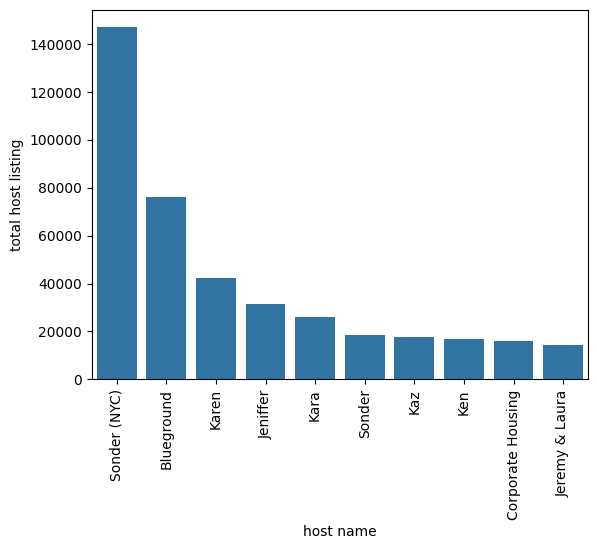

In [469]:
sns.barplot(x=top_n.index, y=top_n['total host listing'])
plt.xticks(rotation=90)
plt.show()

In [470]:
print(f"The host with the highest listing is {top_n.idxmax()} with {top_n.values.max()}")

The host with the highest listing is total host listing    Sonder (NYC)
dtype: object with 146910.0


**Insight** From the about graph we can clearly see that Sonder (NYC) is the host with the highest listing

**Q3. What is the booking rate?**

In [471]:
cleanedAirBnb.head()

,NAME,host_identity_verified,host name,neighborhood_group,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,minimum nights,number of reviews,last review,rating,total host listing,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,10.0,9.0,2021-10-19,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,30.0,45.0,2022-05-21,4.0,2.0,228.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,10.0,9.0,2018-11-19,3.0,1.0,289.0
5,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,577.0,3.0,74.0,2019-06-22,3.0,1.0,374.0
7,BlissArtsSpace!,unconfirmed,Emma,Brooklyn,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,1060.0,45.0,49.0,2017-10-05,5.0,1.0,219.0


**Insight** Owing to the fact that we don't have a number of booking column, we will be using the number of review in place of it. 

In [472]:
cleanedAirBnb['booking rate'] = (cleanedAirBnb['number of reviews'] / cleanedAirBnb['availability 365']) * 100
cleanedAirBnb.head()

,NAME,host_identity_verified,host name,neighborhood_group,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,minimum nights,number of reviews,last review,rating,total host listing,availability 365,booking rate
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,10.0,9.0,2021-10-19,4.0,6.0,286.0,3.146853
1,Skylit Midtown Castle,verified,Jenna,Manhattan,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,30.0,45.0,2022-05-21,4.0,2.0,228.0,19.736842
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,10.0,9.0,2018-11-19,3.0,1.0,289.0,3.114187
5,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,577.0,3.0,74.0,2019-06-22,3.0,1.0,374.0,19.786096
7,BlissArtsSpace!,unconfirmed,Emma,Brooklyn,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,1060.0,45.0,49.0,2017-10-05,5.0,1.0,219.0,22.374429


*Since we are dividing we may run into areas where the availability is zero, to handle this we set the infinite value to  null value.*

In [473]:
# cleanedAirBnb.loc[~np.isfinite(cleanedAirBnb['booking rate'].values)] = 0
# cleanedAirBnb['booking rate']

In [474]:
cleanedAirBnb.loc[np.isinf(cleanedAirBnb['booking rate'].values)] = np.nan
cleanedAirBnb['booking rate'].describe()

count    73789.000000
mean        93.297477
std        607.783820
min          0.000000
25%          1.136364
50%          8.115183
75%         39.473684
max      39500.000000
Name: booking rate, dtype: float64

**Insight** From the data set we can say the the average booking rate is 93%

**Q4. What is the most listed property type?**

In [475]:
most_listed_property_type = cleanedAirBnb.groupby(['room type'])[['total host listing']].sum()
most_listed_property_type

,total host listing
room type,
Entire home/apt,527302.0
Hotel room,1278.0
Private room,192099.0
Shared room,8954.0


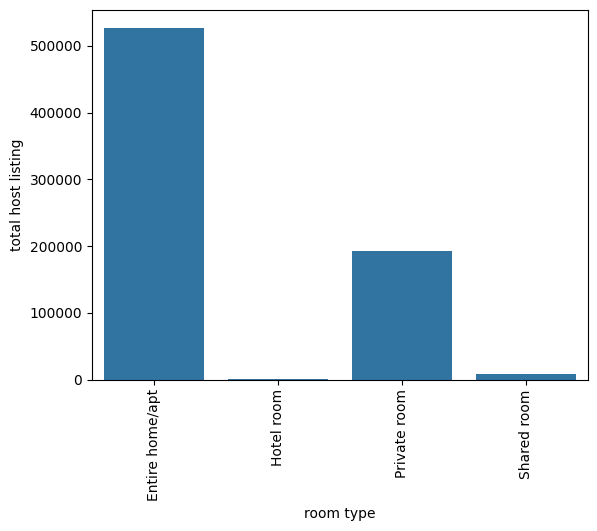

In [476]:
sns.barplot(x=most_listed_property_type.index, y=most_listed_property_type['total host listing'])
plt.xticks(rotation=90)
plt.show()

**Insight** Since our data set has no property type for this analysis we will be using room type. The most listed room type is *Entire home or apartment*.